# 01 - Exploratory Data Analysis

Before cleaning the data, we want to get a sense of what the raw data looks like. I will be accomplishing this using EDA. Through summary statistics and visualizations, I will understand exactly what needs to be done to the data in order to prepare it for use in training our model.

## Importing Libararies

In [50]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in pandas output (otherwise the columns are truncated)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Loading Data

The dataset I have chosen is from Kaggle. Each row represents an employee. The dataset includes information about each employee and whether they left their employment.

In [51]:
# Loading raw data into a data frame using Pandas
df = pd.read_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/raw/HR-Employee-Attrition.csv')
# Printing the first couple of rows in the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Inspecting Data Structure

To get a general understanding of the dataset, we will use info(). The dataset is large enough to use for training, with 1470 rows and 35 columns. There are 26 numeric variables and 9 string variables. We can also see that each column has 1470 non-null inputs.

In [52]:
# Quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We will use describe() to understand the distribution of the data and find anything that needs to be addressed in the data cleaning step. We can see that the variable EmployeeCount has a value of 1 for every single row. We should also pay attention to StandardHours, which also seems to have the same value for every instance. I would also note that some columns measuring years seem to have some extreme values on the greater side.

In [53]:
# Summary Statistics
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In order to identify the type of variables (nominal, ordinal, continuous) we are dealing with and to identify columns that might not be useful to us, we will be looking at the value counts of each variable. We can see that Over18, StandardHours, and EmployeeCount all have the same value for each instance. We can also see that EmployeeNumber is an identification number and isn't valuable to our model.

In [54]:
# Number of unique values in each column
unique_counts = df.nunique().sort_values()
display(unique_counts)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Now, to check the balance of the target variable, we will create a table showing the percentage of employees who left the company versus those who stayed. We can see that 83.9% of the instances in the Attrition variable have the value of "No' while the remaining 16.1% have a value of "Yes". This means we have very imbalanced data; therefore, using accuracy as an evaluation metric will not suffice. We will have to rely on recall and ROC-AUC more heavily.

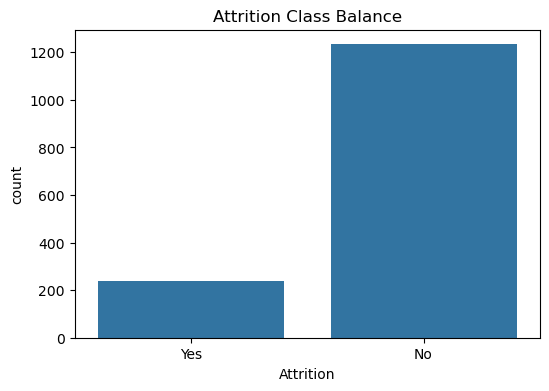

In [55]:
# Checking the balance of the data
df['Attrition'].value_counts(normalize=True)

# Visualize the split of the Attrition variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Class Balance')
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/attrition_class_balance.png')
plt.show()

## Check for Missing Values

To make sure we are catching all missing values that might interfere with our model, we will be using isnull(). As we saw previously, there are no missing values in our dataset. This will simplify our data cleaning process.

In [56]:
# Looking for Null Values
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Univariate Analysis

Now we will be visualizing the distribution of some key variables to gain insights. I am choosing variables that are useful and interesting. I am using my intuition to pick those variables that I feel would strongly influence an employee's decision to leave their job.

In [57]:
# Temporarily Mapping Ordinal Categorical Variables

# Education mapping
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Environment Satisfaction mapping
environment_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Job Satisfaction mapping
job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Work Life Balance mapping
work_life_balance_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Performance Rating mapping
performance_rating_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

# Apply the mappings (create new columns)
df['EducationLevel'] = df['Education'].map(education_map)
df['EnvironmentSatisfactionLevel'] = df['EnvironmentSatisfaction'].map(environment_satisfaction_map)
df['JobSatisfactionLevel'] = df['JobSatisfaction'].map(job_satisfaction_map)
df['WorkLifeBalanceLevel'] = df['WorkLifeBalance'].map(work_life_balance_map)
df['PerformanceRatingLevel'] = df['PerformanceRating'].map(performance_rating_map)


From the visualizations for numerical variables, we can see that the Age looks normally distributed, while MonthyIncome and PercentSalaryHike seem to be right-skewed.

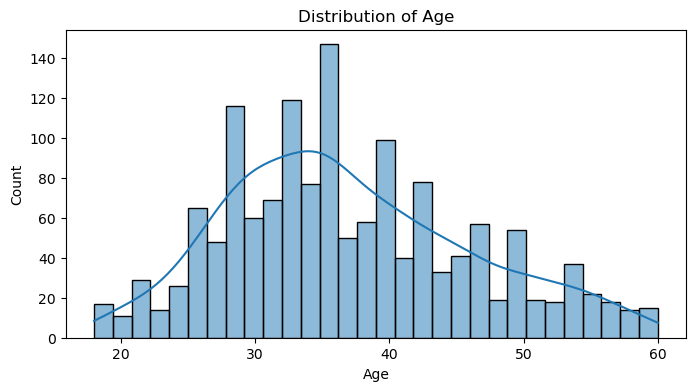

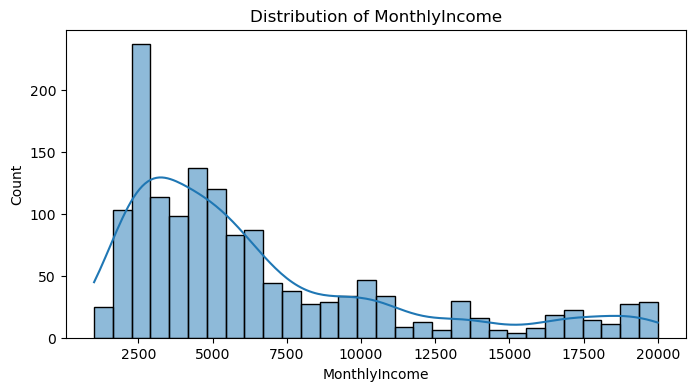

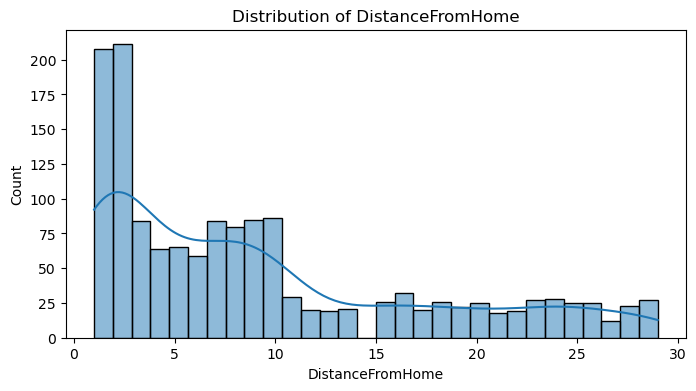

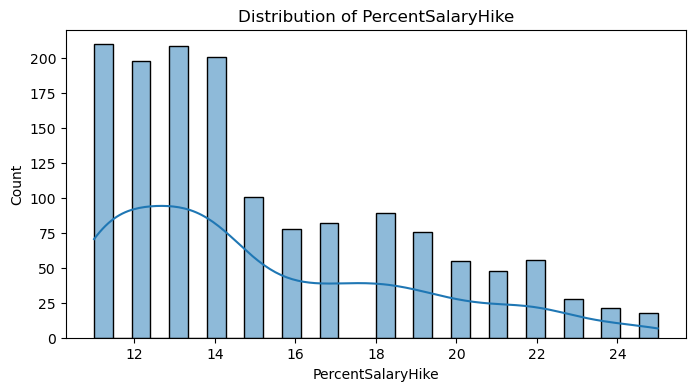

In [58]:
# Visualizations for Numerical Variables
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'PercentSalaryHike']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/{feature}_distribution.png')  # Save plots
    plt.show()

From the visualizations for categorical variables, we can see that the majority of the employees in the dataset are from the Research & Development department. The top three roles in our dataset are Sales Executive, Research Scientist, and Laboratory Technician. We can also see that most employees have an education in the Life Sciences or Medical field. The distribution of the PerformanceRatingLevel variable shows that there were no instances of "Good" or "Low" performance, and was almost entirely of "Outstanding" ratings. The majority of employees believe their work-life balance is "Better".

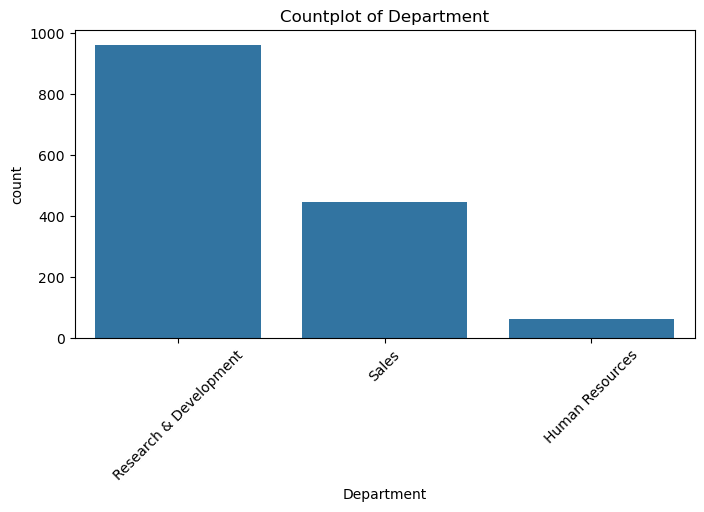

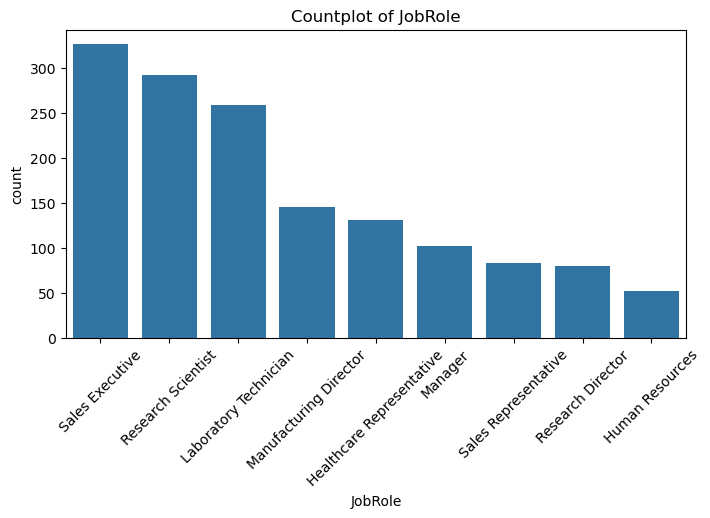

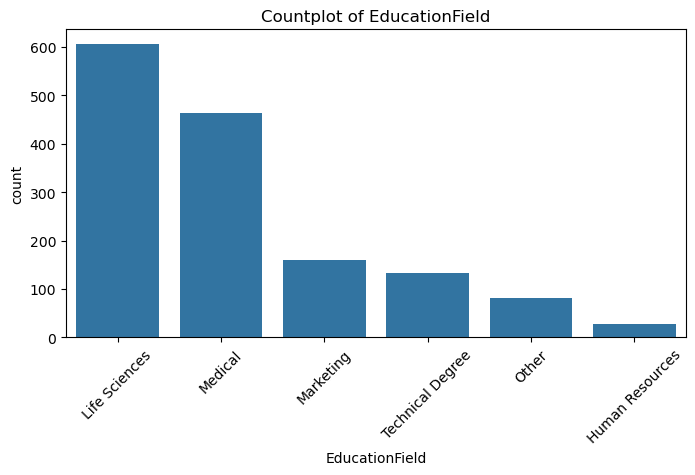

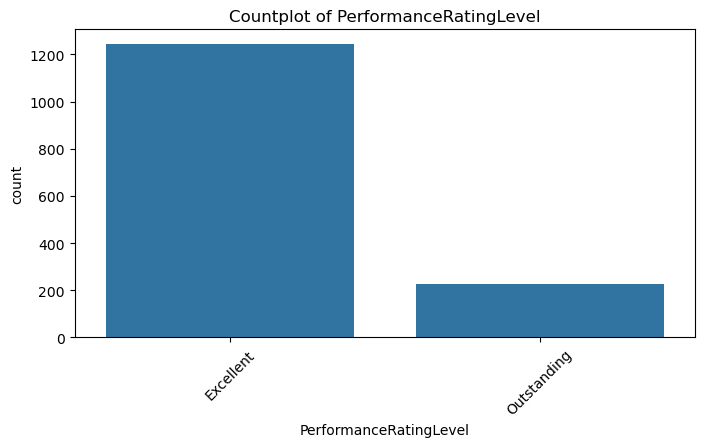

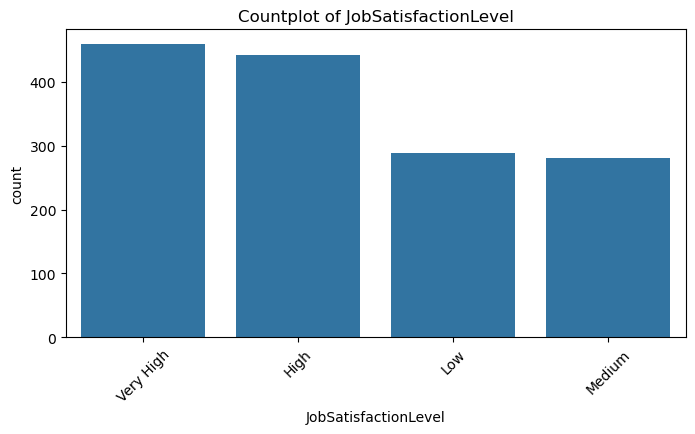

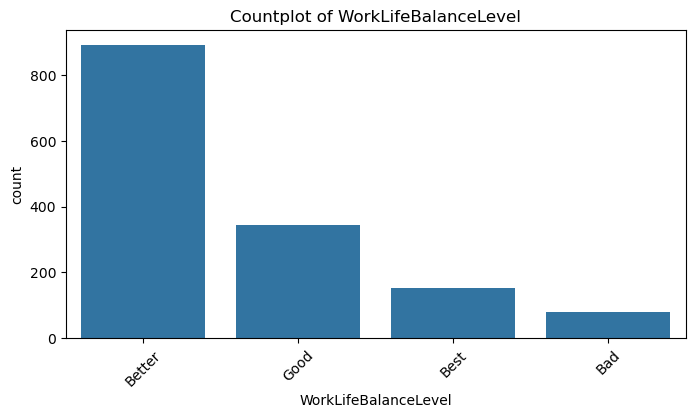

In [59]:
# Visualizations for Categorical Variables
categorical_features = ['Department', 'JobRole', 'EducationField', 'PerformanceRatingLevel', 'JobSatisfactionLevel', 'WorkLifeBalanceLevel']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.savefig(f'/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/{feature}_countplot.png')  # Save plots
    plt.show()

## Multivariate Analysis

Now I will be comparing the distribution of some key variables across the target variable. This will help highlight some trends that we might be able to use when selecting features.

From the Age vs Attrition visualization, we can see that the average age is lower among the population of employees who left their employment.

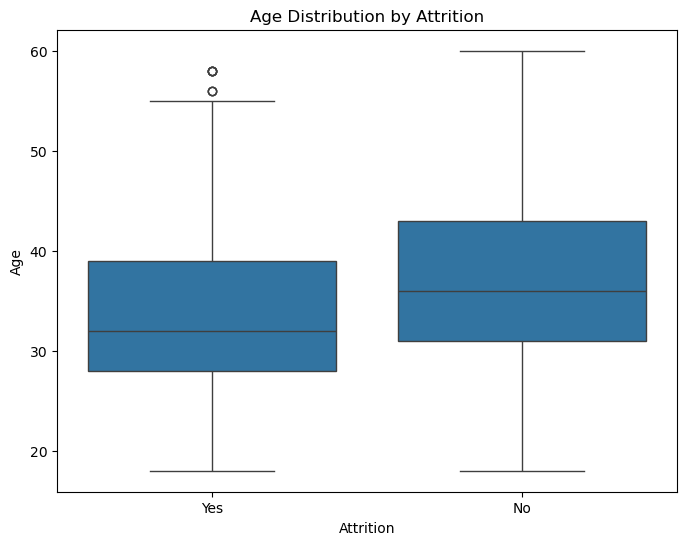

In [60]:
# Age vs Attrition Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/attrition_vs_age.png')
plt.show()

The visualization and table of proportions show that men and women leave at very similar rates, with men having an attrition rate of 17% while women have an attrition rate of 14.8%.

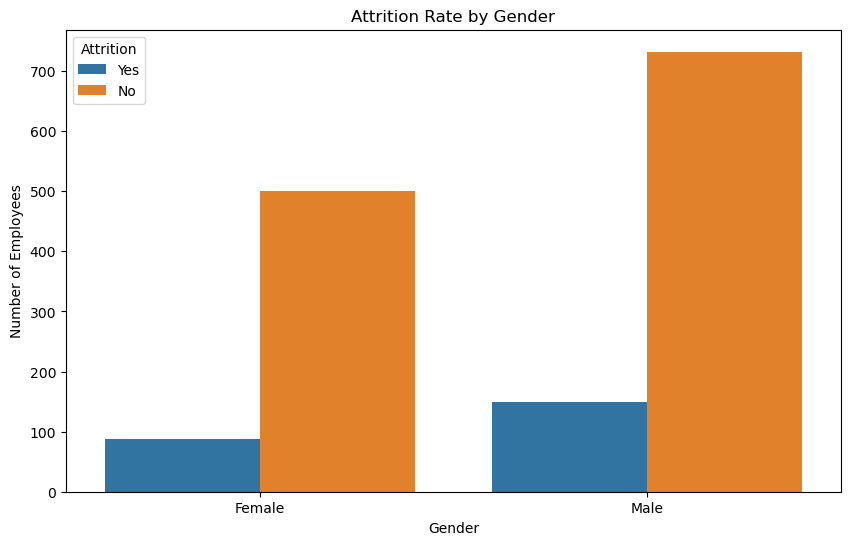

Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


In [61]:
# Gender vs Attrition Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/attrition_vs_gender.png')
plt.show()

# Proportion of Attrition by Gender
gender_attrition_rate = pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100
display(gender_attrition_rate)

The distribution of MonthlyIncome by Attrition shows that, on average, employees who left the company earned less per month than those who chose to stay.

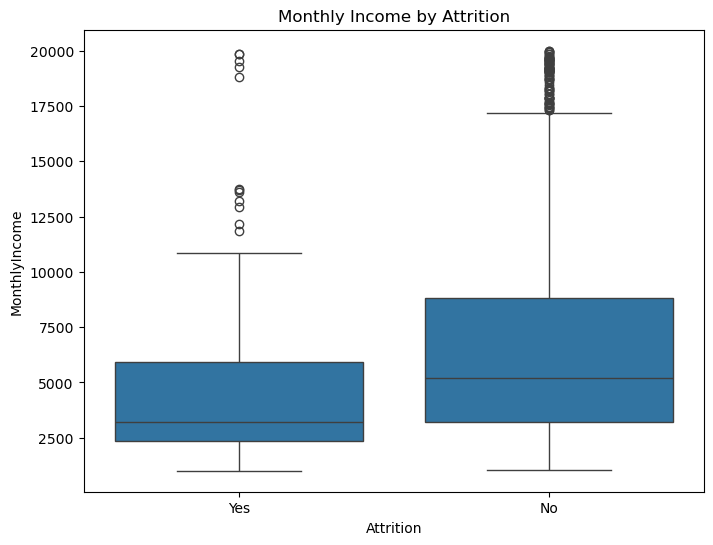

In [62]:
# Attrition vs MonthlyIncome Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/attrition_vs_income.png')
plt.show()

Visualizing the attrition rate across the distribution of JobSatisfaction shows us that those who reported "Low" job satisfaction are leaving at a slightly higher rate. The attrition rate among those who reported "Low" job satisfaction is 22.8%. That rate drops to around 16% for those reporting "High" or "Medium" job satisfaction. The attrition rate for those with "Very High" job satisfaction is around 11%.

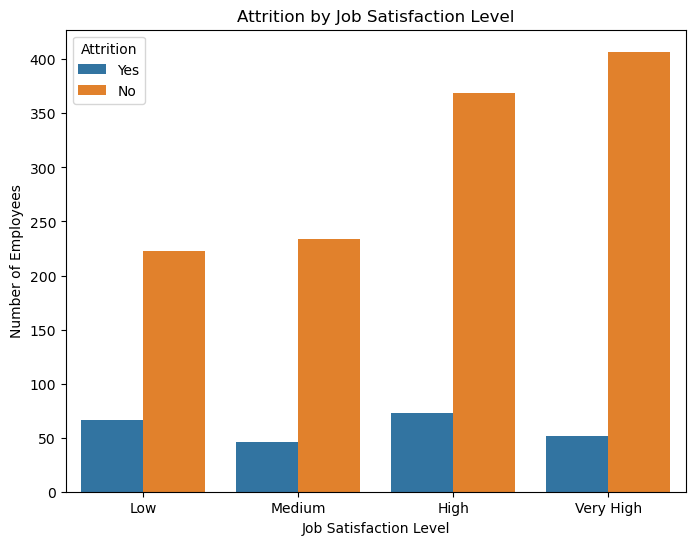

Attrition,No,Yes
JobSatisfactionLevel,,
High,83.484163,16.515837
Low,77.162630,22.837370
Medium,83.571429,16.428571
Very High,88.671024,11.328976


In [63]:
# JobSatisfactionLevel vs Attrition Visualization
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='JobSatisfactionLevel', hue='Attrition', order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Attrition by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/attrition_vs_job-satisfaction.png')
plt.show()

# Proportion of Attrition by JobSatisfactionLevel
job_satisfaction_attrition_rate = pd.crosstab(df['JobSatisfactionLevel'], df['Attrition'], normalize='index') * 100
display(job_satisfaction_attrition_rate)

## Analyzing Interactions

In order to get a quick insight into the variables that are correlated with our target variable, we will be creating a correlation matrix for numerical variables. We can also get a sense of any potential for multicollinearity.

From the heatmap, we can see that there are no strong predictor candidates for attrition since all the numeric variables have a correlation between -0.2 and 0.2. As for multicollinearity, the variables with the strongest correlation are TotalWorkingYears and JobLevel, which have a coefficient of 0.78. Some variable pairs with a correlation coefficient of 0.77 are MonthlyIncome/TotalWorkingYears and YearsWithCurrManager/YearsAtCompany.

In [64]:
# Create a temporary numeric version of Attrition
df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

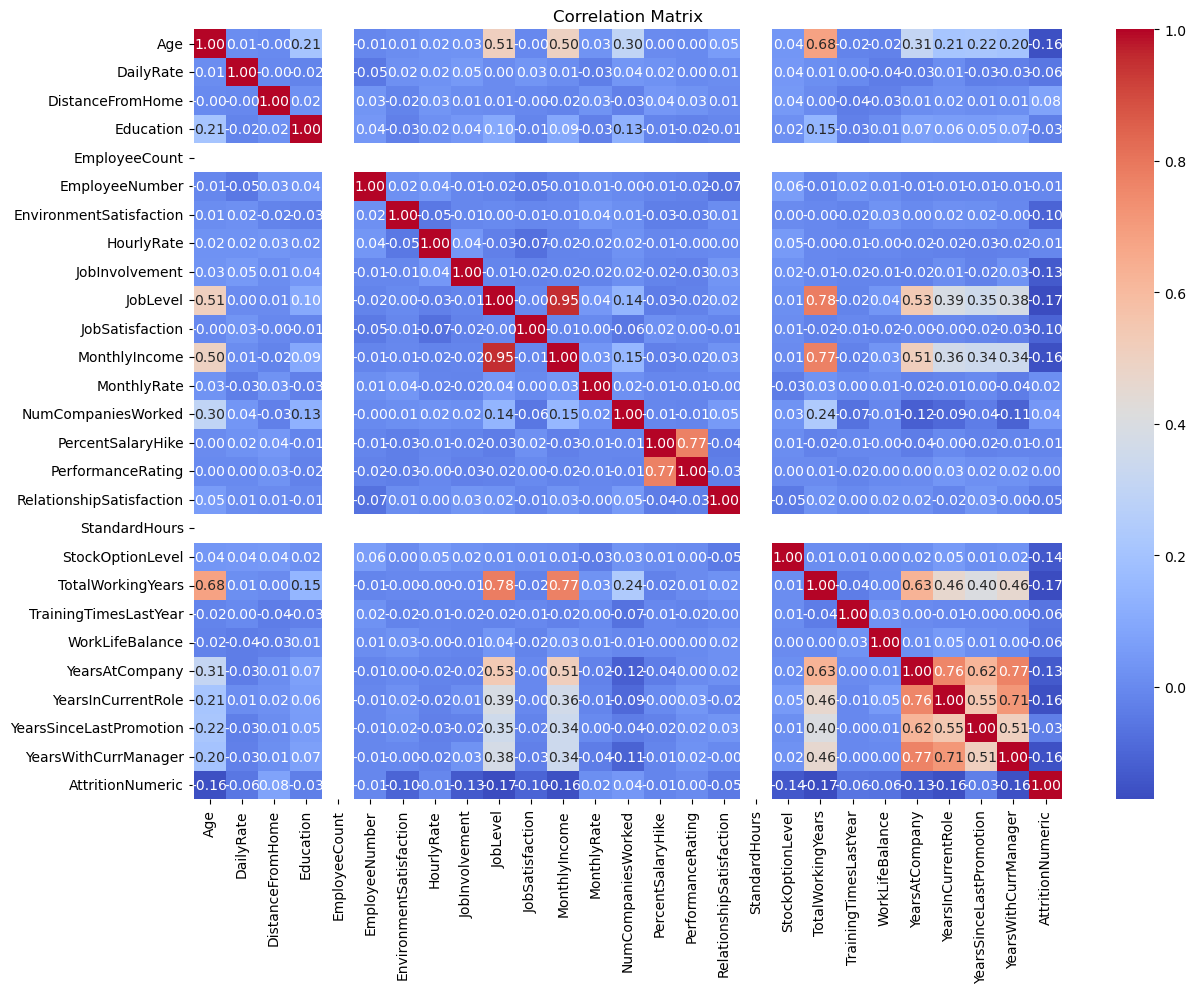

In [65]:
# Calculate correlation matrix for numerical variables
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/correlation_matrix.png')
plt.show()

## Key Findings

Through our exploratory data analysis, we found that our dataset gives us insights into employee demographics, job roles, satisfaction, compensation, and performance. The dataset includes 35 columns, of which 3 (EmployeeCount, Over18, and StandardHours) will not add any value to our model since they consist of the same value for all 1470 rows. We found that the dataset has no missing values. We observed a clear class imbalance in the target variable `Attrition`, with approximately 16% of employees labeled as having left the company. This imbalance will influence our choice of evaluation metrics. There are also some concerns about the MonthlyIncome variable, which is right-skewed and might have some outliers. These insights will be taken into consideration as we proceed with data cleaning and preprocessing.